# Road analysis for classifying into extreme end 

In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense,Dropout
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
data = np.loadtxt("data/dataset_0_1.csv",delimiter=",")

In [3]:
data.shape

(1359, 7)

In [4]:
x = data[:,0:-1]
y = data[:,-1]

# Spliting dataset into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
print(x.shape)
print(y.shape)

(1359, 6)
(1359,)


In [5]:
count_of_0=0 
for i in y:
    if (i==0) :
        count_of_0=count_of_0+1
print("0 :",count_of_0)
count_of_1=0 
for i in y:
    if (i==1) :
        count_of_1=count_of_1+1
print("1 :",count_of_1)

0 : 691
1 : 668


In [6]:
x_train.shape

(951, 6)

In [7]:
x_test.shape

(408, 6)

In [8]:
y_test.shape

(408,)

In [9]:
y_train.shape

(951,)

In [10]:
y_train

array([0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1.

In [11]:
x_train.shape[1]

6

# Creating the model

In [12]:
model = Sequential()
model.add(Dense(6,input_dim=x_train.shape[1],activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.0))
model.add(Dense(1,activation='sigmoid'))

# Compiling the model 

In [13]:
learning_rate = 0.001
model.compile(loss="binary_crossentropy",metrics=['accuracy'],optimizer=Adam(learning_rate))

# Training 

In [14]:
epochs = 70
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs,validation_data=(x_test, y_test))

Epoch 1/70
30/30 [==============================] - 0s 7ms/step - loss: 0.6895 - accuracy: 0.6782 - val_loss: 0.6771 - val_accuracy: 0.7892
Epoch 2/70
30/30 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.8002 - val_loss: 0.6476 - val_accuracy: 0.8186
Epoch 3/70
30/30 [==============================] - 0s 1ms/step - loss: 0.6243 - accuracy: 0.8170 - val_loss: 0.6004 - val_accuracy: 0.8284
Epoch 4/70
30/30 [==============================] - 0s 2ms/step - loss: 0.5788 - accuracy: 0.8181 - val_loss: 0.5487 - val_accuracy: 0.8235
Epoch 5/70
30/30 [==============================] - 0s 1ms/step - loss: 0.5381 - accuracy: 0.8286 - val_loss: 0.5032 - val_accuracy: 0.8358
Epoch 6/70
30/30 [==============================] - 0s 1ms/step - loss: 0.5061 - accuracy: 0.8286 - val_loss: 0.4689 - val_accuracy: 0.8431
Epoch 7/70
30/30 [==============================] - ETA: 0s - loss: 0.4414 - accuracy: 0.96 - 0s 2ms/step - loss: 0.4805 - accuracy: 0.8360 - val_loss: 0.4408 -

Epoch 57/70
30/30 [==============================] - 0s 1ms/step - loss: 0.3297 - accuracy: 0.8612 - val_loss: 0.3280 - val_accuracy: 0.8603
Epoch 58/70
30/30 [==============================] - ETA: 0s - loss: 0.3208 - accuracy: 0.87 - 0s 1ms/step - loss: 0.3281 - accuracy: 0.8665 - val_loss: 0.3307 - val_accuracy: 0.8627
Epoch 59/70
30/30 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8601 - val_loss: 0.3294 - val_accuracy: 0.8652
Epoch 60/70
30/30 [==============================] - 0s 2ms/step - loss: 0.3276 - accuracy: 0.8623 - val_loss: 0.3304 - val_accuracy: 0.8578
Epoch 61/70
30/30 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8612 - val_loss: 0.3323 - val_accuracy: 0.8554
Epoch 62/70
30/30 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8633 - val_loss: 0.3299 - val_accuracy: 0.8627
Epoch 63/70
30/30 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8644 - val_loss: 0

# Ploting 

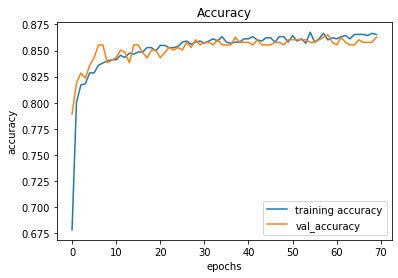

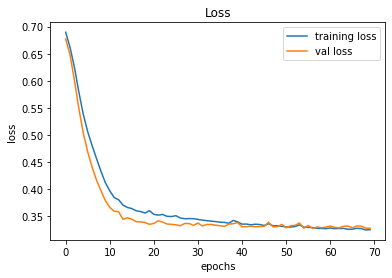

In [15]:
plt.figure(0)
plt.plot(history.history['accuracy'],label='training accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import accuracy_score

# prediction on training data
label = np.array(y_train)
pred_train = model.predict_classes(x_train)
print("Accuracy on training data = ",accuracy_score(label,pred_train)*100,"%")

# prediction on test data
label = np.array(y_test)
pred_test = model.predict_classes(x_test)
print("Accuracy on test data = ",accuracy_score(label,pred_test)*100,"%")
# print(pred_test.reshape(1,y_test.shape[0]))
# print(label)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy on training data =  86.43533123028391 %
Accuracy on test data =  86.27450980392157 %


In [17]:
# analysis on test data
pred_test = model.predict_classes(x_test)

# good road
count1=0
count2=0

for i in range(0,x_test.shape[0]):
    
    if (int(y_test[i])==0 and pred_test[i]==0):
        count1 = count1+1
    elif(int(y_test[i])==0 and pred_test[i]==1): 
        count2 = count2+1
total = count1+count2
print("***************************************************************")
print("Analysis on test data for good road")
print()
print("true detection                        :",(count1/total)*100,"%")
print("false detection - bad is predicted    :",(count2/total)*100,"%")

# bad road
count1=0
count2=0

for i in range(0,x_test.shape[0]):
    
    if (int(y_test[i])==1 and pred_test[i]==1):
        count1 = count1+1
    elif(int(y_test[i])==1 and pred_test[i]==0): 
        count2 = count2+1
total = count1+count2
print("***************************************************************")
print("Analysis on test data for bad road")
print()
print("true detection                         :",(count1/total)*100,"%")
print("false detection - good is predicted    :",(count2/total)*100,"%")

***************************************************************
Analysis on test data for good road

true detection                        : 86.22448979591837 %
false detection - bad is predicted    : 13.77551020408163 %
***************************************************************
Analysis on test data for bad road

true detection                         : 86.32075471698113 %
false detection - good is predicted    : 13.679245283018867 %


In [18]:
sample = np.array([data[604][0:-1]])
prob = model.predict(sample)
zone = model.predict_classes(sample)
print("probability : ",prob)
print("Class       : ",zone)

probability :  [[0.8916478]]
Class       :  [[1]]


In [19]:
sample = np.array([data[605][0:-1]])
prob = model.predict(sample)
zone = model.predict_classes(sample)
print("probability : ",prob)
print("Class       : ",zone)

probability :  [[0.9175954]]
Class       :  [[1]]


In [35]:
sample = np.array([data[610][0:-1]])
prob = model.predict(sample)
zone = model.predict_classes(sample)
print("probability : ",prob)
print("Class       : ",zone)

probability :  [[0.99917257]]
Class       :  [[1]]


In [69]:
sample = np.array([data[365][0:-1]])
prob = model.predict(sample)
zone = model.predict_classes(sample)
print("probability : ",prob)
print("Class       : ",zone)

probability :  [[0.07492959]]
Class       :  [[0]]


In [73]:
# model.save('model/road_analytics_model_extreme_end_hardware.h5')

# Loading the model

In [74]:
# from keras.models import load_model

# model = load_model('model/road_analytics_model_extreme_end_hardware.h5')

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 56        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 1

In [25]:
# Trying with real world input
samples = np.array([data[0][0:-1]])     
prediction = model.predict_classes(samples)
prediction

array([[1]])

In [26]:
samples = np.array([data[6][0:-1]])     
prediction = model.predict_classes(samples)
prediction

array([[1]])